<a href="https://colab.research.google.com/github/ady909/Capstone-Project-Bike-Sharing-Demand-Prediction-/blob/main/Capstone_Project_Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Title : Seoul Bike Sharing Demand Prediction

### Project Type - Regression

### Contribution - Individual

## Problem Description

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import files
upload = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})


In [3]:
#loading data
bike_df = pd.read_csv("SeoulBikeData.csv" , encoding = "unicode_escape")

## Getting to know about data

In [4]:
#first 20 rows look
bike_df.head(n = 20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#last 20 rows look
bike_df.tail(n = 20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8740,30/11/2018,116,4,-0.5,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
8741,30/11/2018,149,5,-0.7,66,0.5,1336,-6.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
8742,30/11/2018,293,6,-0.8,68,0.8,1322,-5.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8743,30/11/2018,750,7,-1.2,70,0.8,1351,-5.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8744,30/11/2018,1527,8,-1.5,68,1.1,1286,-6.6,0.02,0.0,0.0,Autumn,No Holiday,Yes
8745,30/11/2018,809,9,-0.4,57,0.6,1270,-7.8,0.45,0.0,0.0,Autumn,No Holiday,Yes
8746,30/11/2018,554,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
8747,30/11/2018,642,11,5.3,43,1.8,1177,-6.2,1.38,0.0,0.0,Autumn,No Holiday,Yes
8748,30/11/2018,720,12,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes
8749,30/11/2018,740,13,7.1,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes


Data in consist of info about the bike rented on hourly bases from 01/12/2017 to 30/11/2018. Weather conditions are also taken into consideration.

In [6]:
#chcking dimensions of dataset
bike_df.shape

(8760, 14)

There are total 8760 data points , 13 features and one target output i.e. Rented Bike Count

In [7]:
#summary
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Numerical as well as categorical variables are present. There are no null values in any column.Date has datatype named object so we need to change it to date datatype.


In [8]:
#creating function to change data type of date
def get_date(Date):
  date_obj = dt.datetime.strptime(Date , "%d/%m/%Y")
  date_obj = pd.to_datetime(date_obj, format = "%Y-%m-%d")
  return date_obj


In [9]:
 #applying function
 bike_df["Date"] = bike_df["Date"].apply(get_date)

In [10]:
# extracting date, month and day of week
bike_df['Day'] = bike_df['Date'].apply(lambda x : x.day)
bike_df['Month'] = bike_df['Date'].apply(lambda x : x.month)
bike_df['Day_of_week'] = bike_df['Date'].dt.day_name()

bike_df= bike_df.drop("Date", axis= 1)

In [11]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday


In [12]:
# checking for duplicate values
bike_df.duplicated().sum()

0

In [13]:
# checking for missing values
bike_df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Day_of_week                  0
dtype: int64

There are no duplicate as  well as missing values.

##Exploratory Data Analysis

### Univariate Analysis

Let's analyse target variable Rented Bike Count  

In [14]:

bike_df["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Let's see Distribution of Rented Bike Count

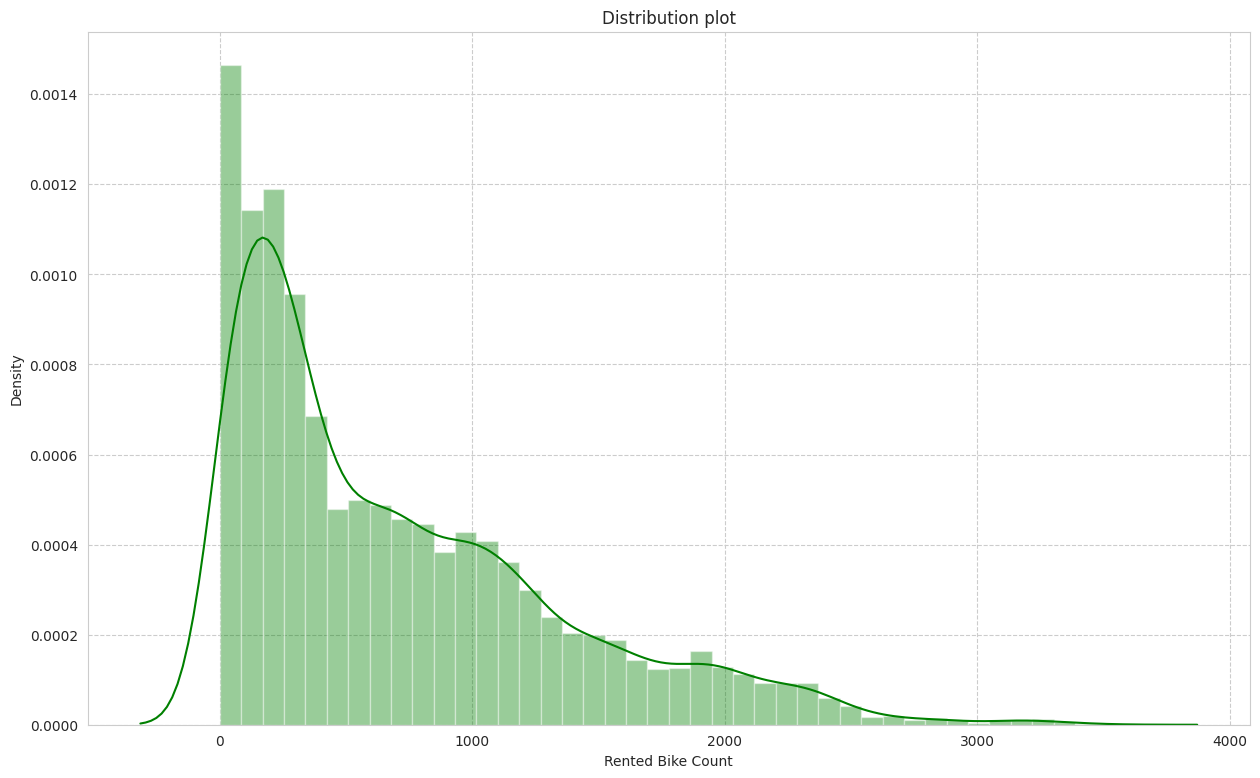

In [15]:
# distribution plot
plt.figure(figsize=(15,9))
sns.distplot(bike_df["Rented Bike Count"] , kde=True,color='g')
plt.title("Distribution plot");


In [16]:
#checking skewness score
bike_df["Rented Bike Count"].skew()

1.1534281773679014

Rented Bike Count is positively skewed and its skewness score is greater than +1 , so we need to apply transformaion technique to reduce its skewness.

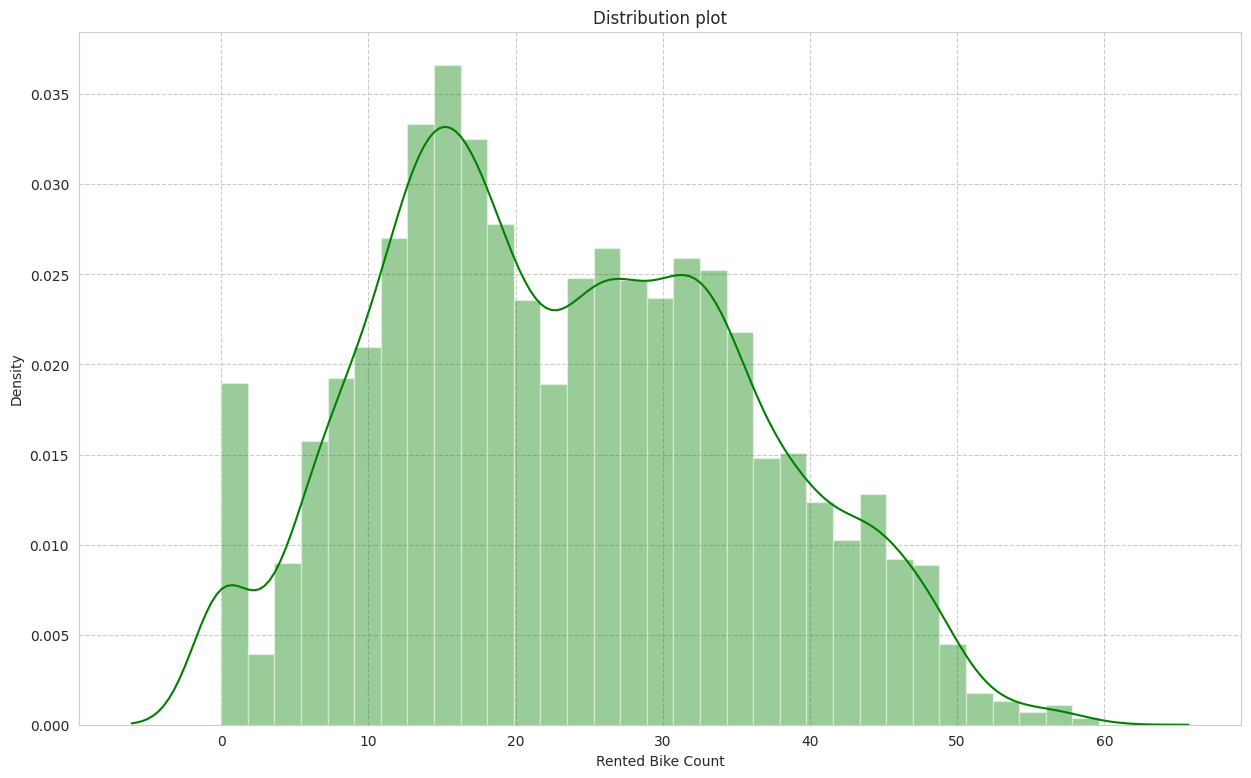

In [17]:
# applying square-root transformation
plt.figure(figsize=(15,9))
sns.distplot(np.sqrt(bike_df["Rented Bike Count"] ), kde=True,color='g')
plt.title("Distribution plot");

In [18]:
#checking skewness score
np.sqrt(bike_df["Rented Bike Count"]).skew()

0.237362090985412

looks Like almost normal distribution.

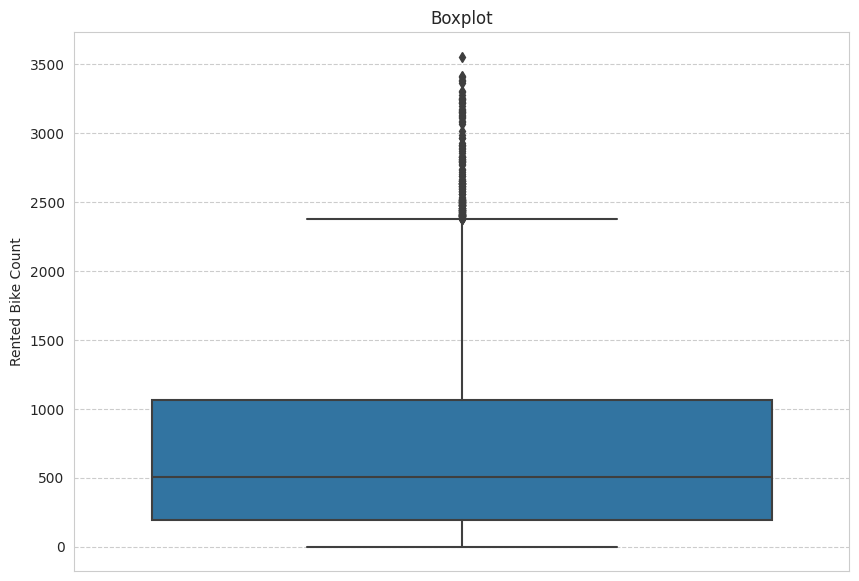

In [19]:
#boxplot for finding outliers
plt.figure(figsize=(10,7))
sns.boxplot( y = bike_df["Rented Bike Count"])
plt.title("Boxplot");

Median for 'Rented Bike Count' is 500 and we can see some outliers over there. So to remove them we have to use 'showfliers' parameter and set it to 'False'.

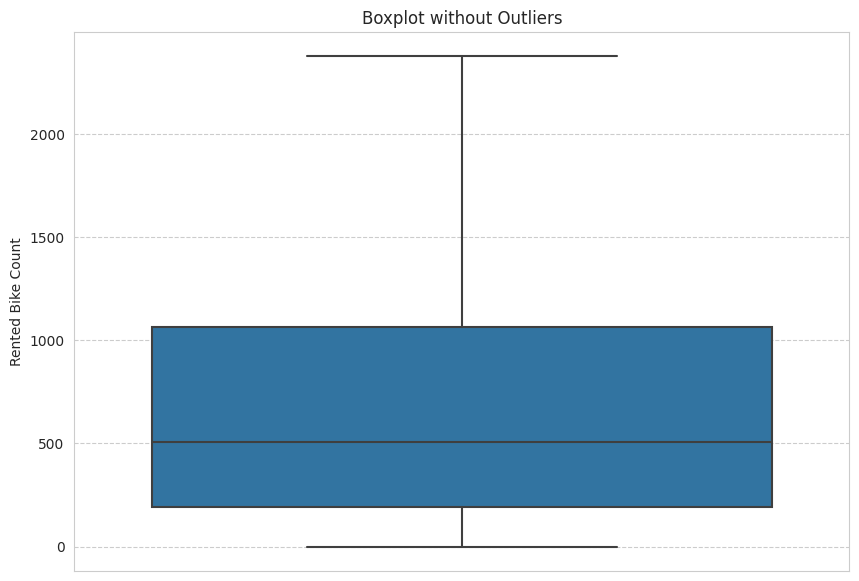

In [20]:
#boxplot
plt.figure(figsize=(10,7))
sns.boxplot( y = bike_df["Rented Bike Count"] , showfliers = False)
plt.title("Boxplot without Outliers");

## Independent Variables

### Numerical Variables


In [21]:
#making list of numerical variables
numerical_variables = list(bike_df.describe().columns[1:])
numerical_variables

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [22]:
#summary of numerical feature
bike_df[numerical_variables].describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027
std,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000
50%,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000
75%,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000


As these columns are numerical columns , we can use histogram visualisation to understand their distribution

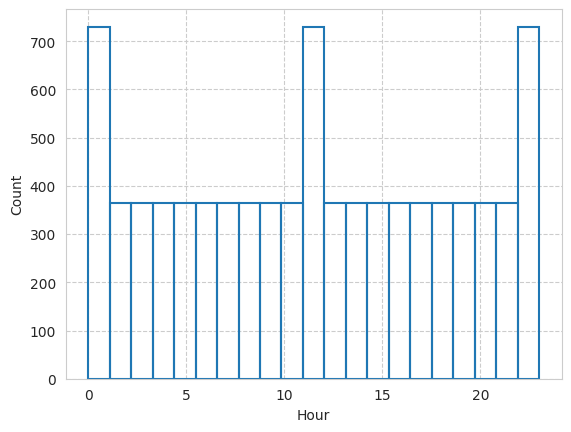

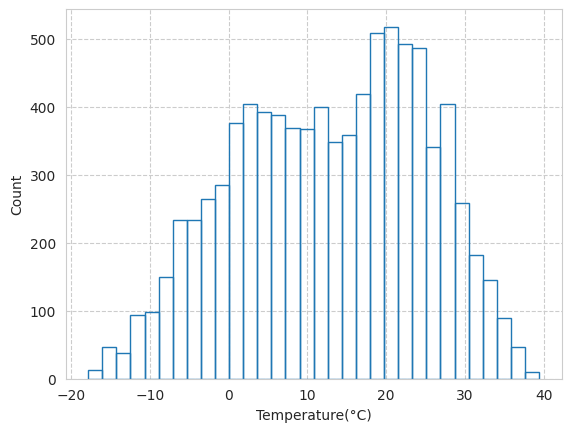

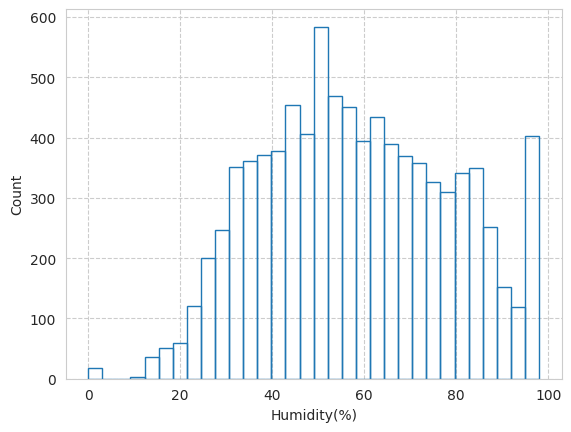

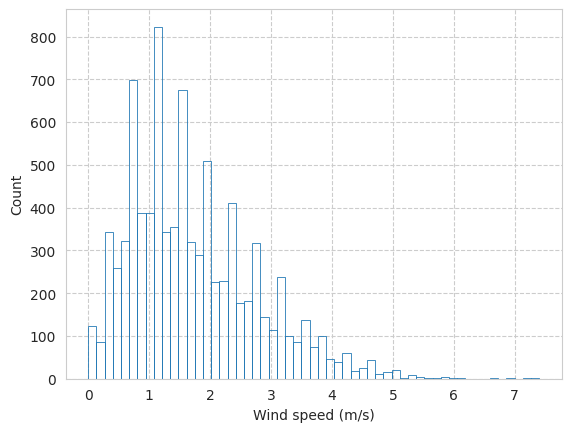

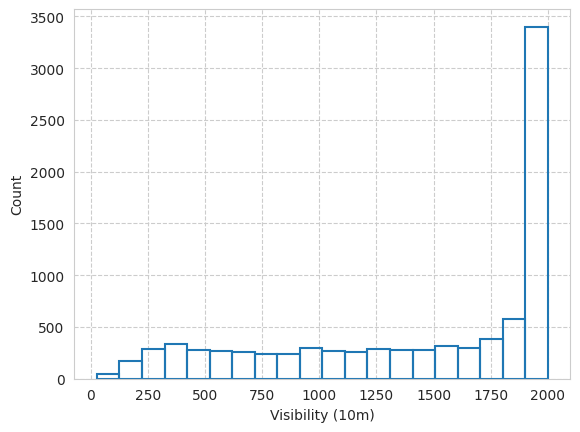

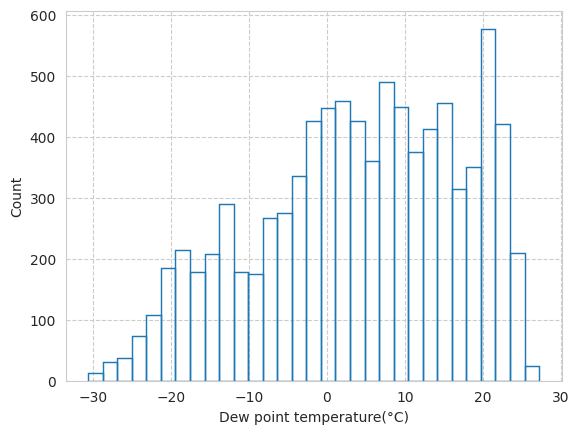

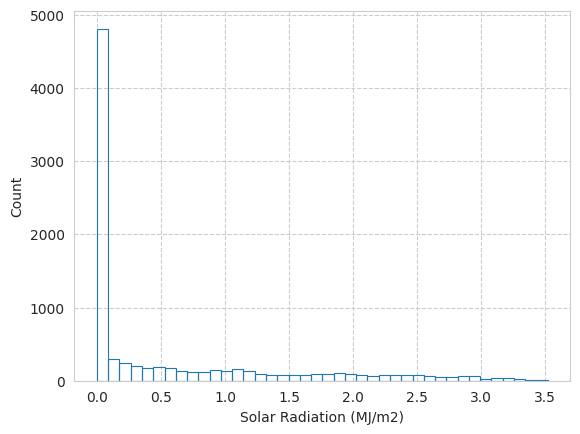

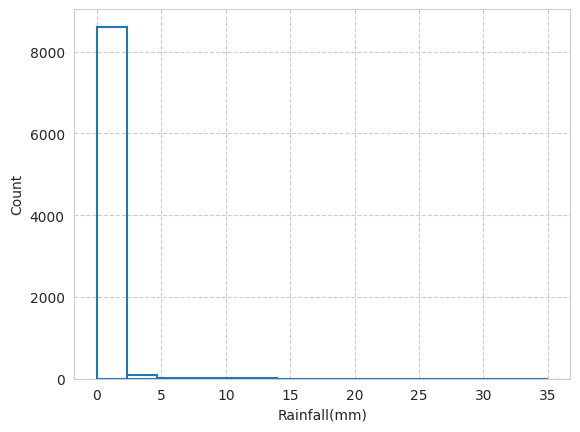

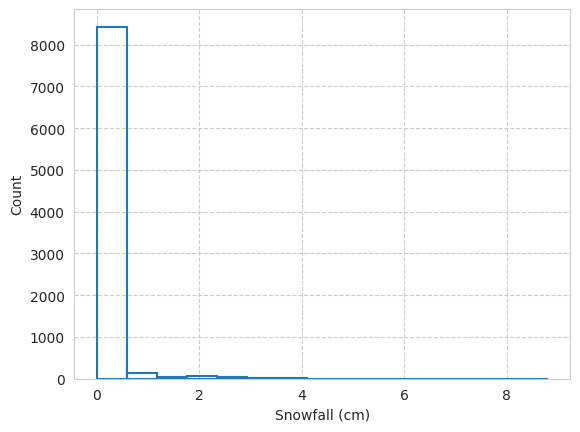

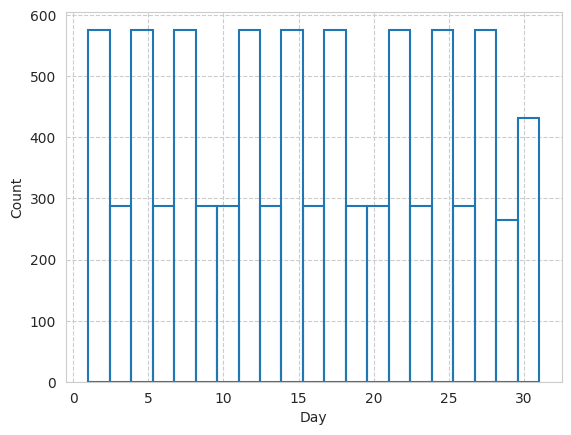

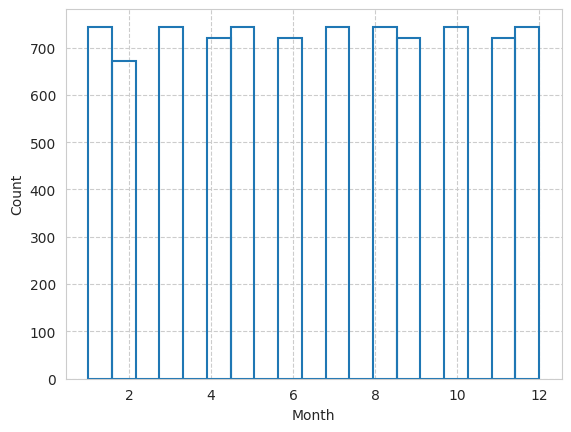

In [23]:
# histogram for each numerical feature count
for column in numerical_variables:
    num_feature = bike_df[column]
    sns.histplot(num_feature , fill = False)


    plt.show()

To find out outliers present in these features , we use Boxplot.

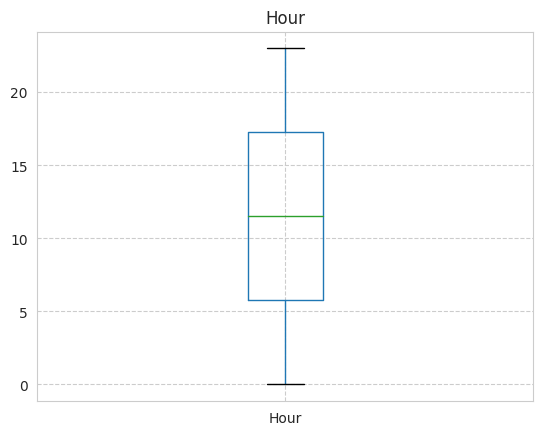

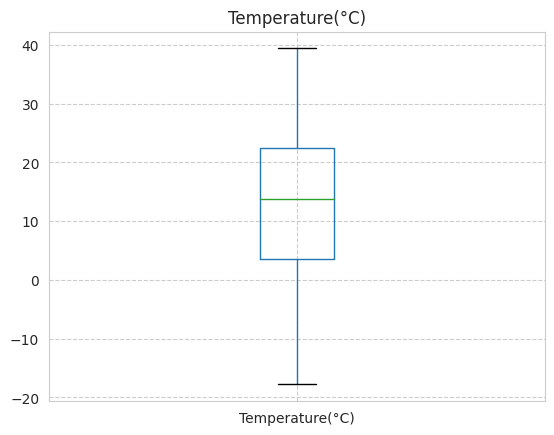

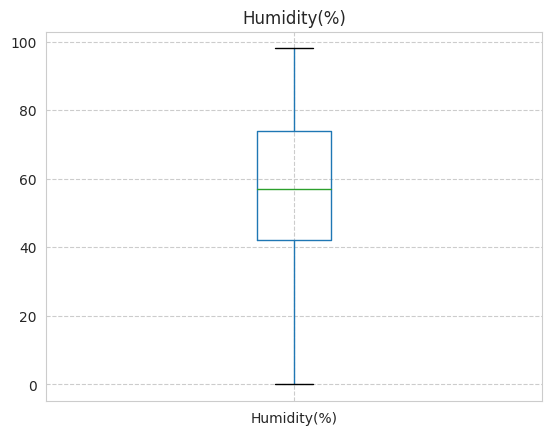

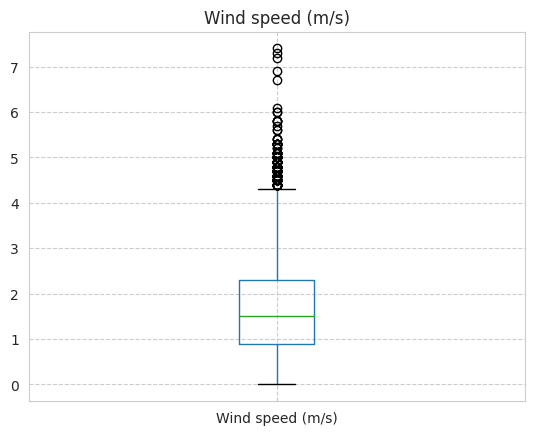

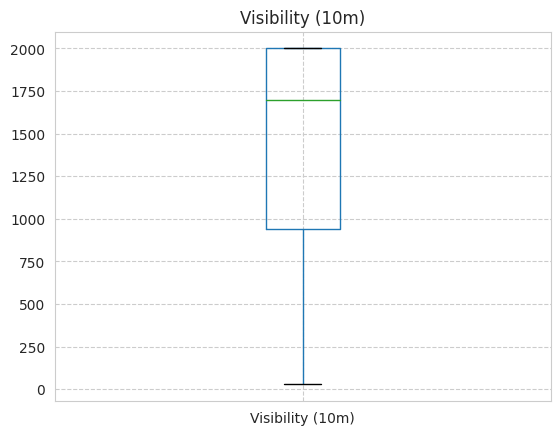

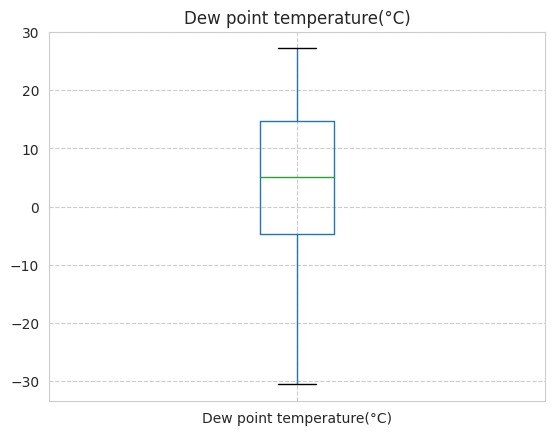

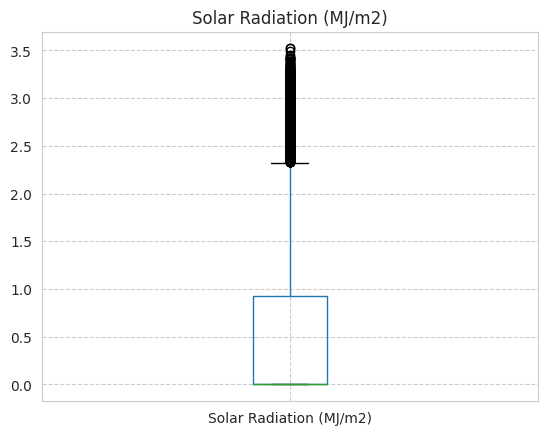

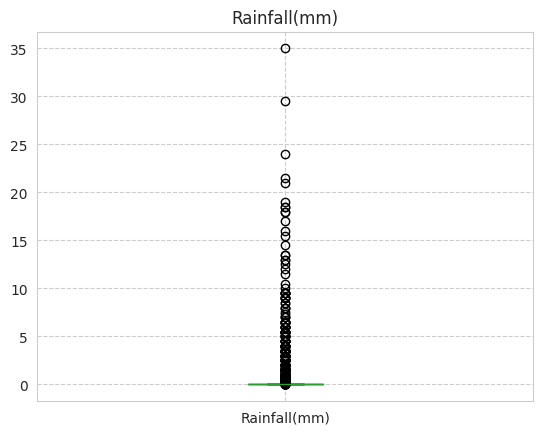

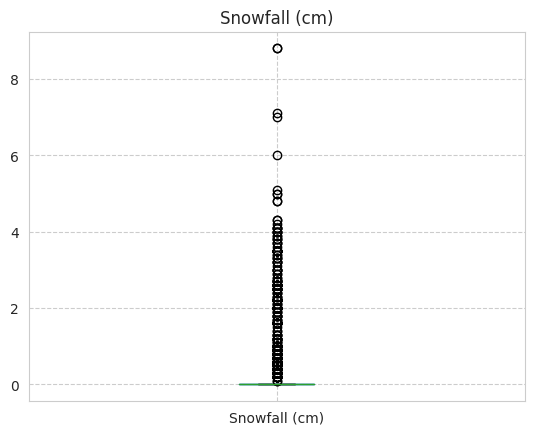

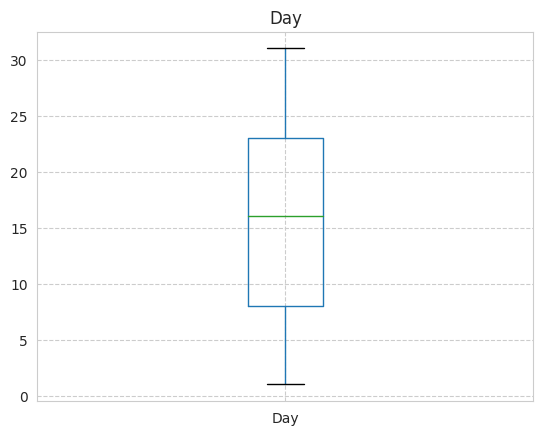

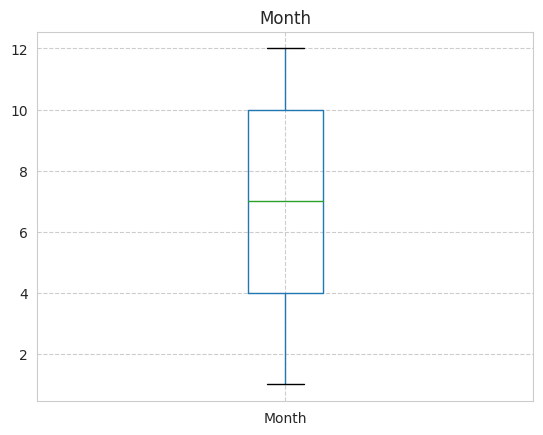

In [24]:
# boxplot for each numerical feature
for column in numerical_variables:
    figure = plt.figure()
    ax = figure.gca()
    bike_df.boxplot(column, ax = ax)
    ax.set_title(column)
plt.show()

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.

## Categorical Variables

In [25]:
#list of categorical variables
categorical_variables = bike_df.select_dtypes(include = "object" )
categorical_variables

,Seasons,Holiday,Functioning Day,Day_of_week
0,Winter,No Holiday,Yes,Friday
1,Winter,No Holiday,Yes,Friday
2,Winter,No Holiday,Yes,Friday
3,Winter,No Holiday,Yes,Friday
4,Winter,No Holiday,Yes,Friday
...,...,...,...,...
8755,Autumn,No Holiday,Yes,Friday
8756,Autumn,No Holiday,Yes,Friday
8757,Autumn,No Holiday,Yes,Friday
8758,Autumn,No Holiday,Yes,Friday


In [26]:
#find unique values in "Seasons"
list(bike_df['Seasons'].unique())

['Winter', 'Spring', 'Summer', 'Autumn']

In [27]:
#find unique values in "Holiday"
list(bike_df['Holiday'].unique())

['No Holiday', 'Holiday']

In [28]:
#find unique values in "Functioning Day"
list(bike_df['Functioning Day'].unique())

['Yes', 'No']

In [29]:
#find unique values in "Day_of_week"
list(bike_df['Day_of_week'].unique())

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

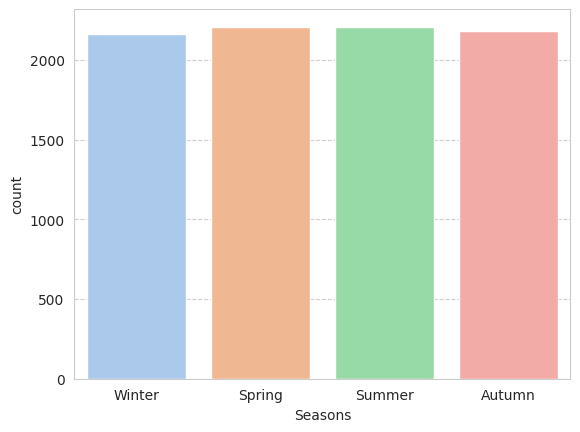

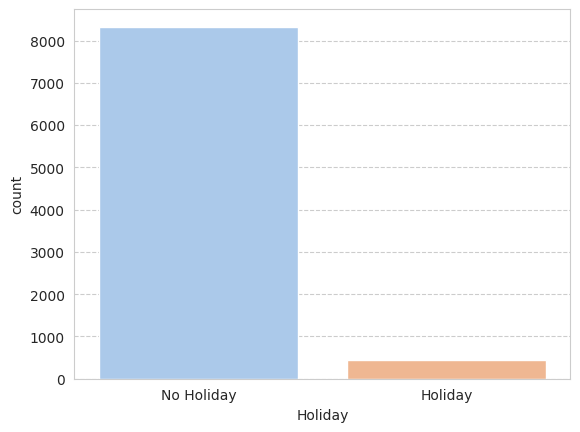

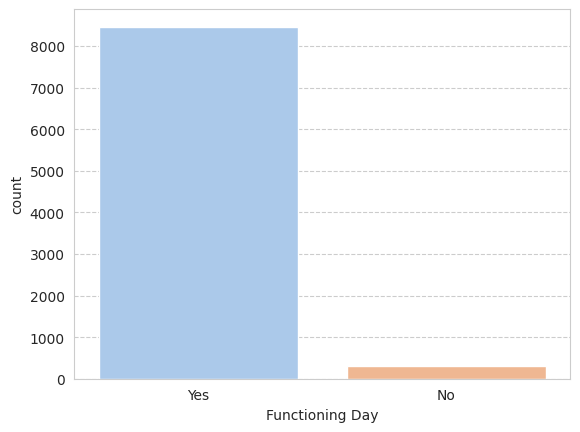

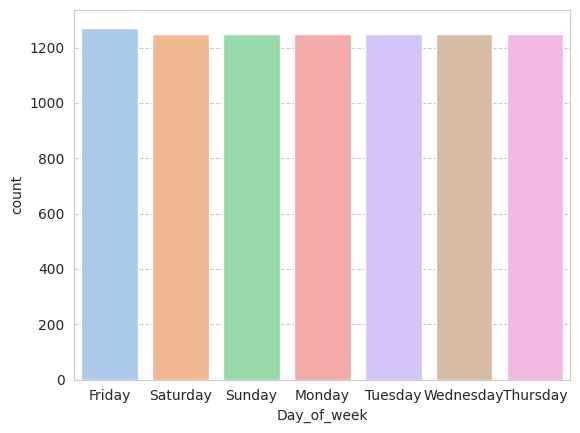

In [30]:
#countplot
for column in list(categorical_variables):
  sns.countplot(data = bike_df , x = column , palette='pastel' )
  plt.show()

In every season , each week day seems like a functional day and there are very few holiday and non-functional day counts.

## Bivariate Analysis

### Numerical Variable vs "Rented Bike Count"

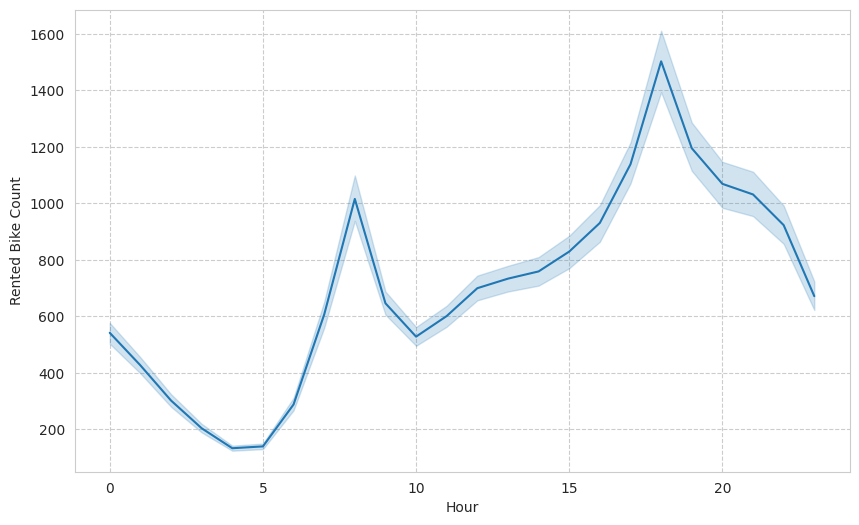

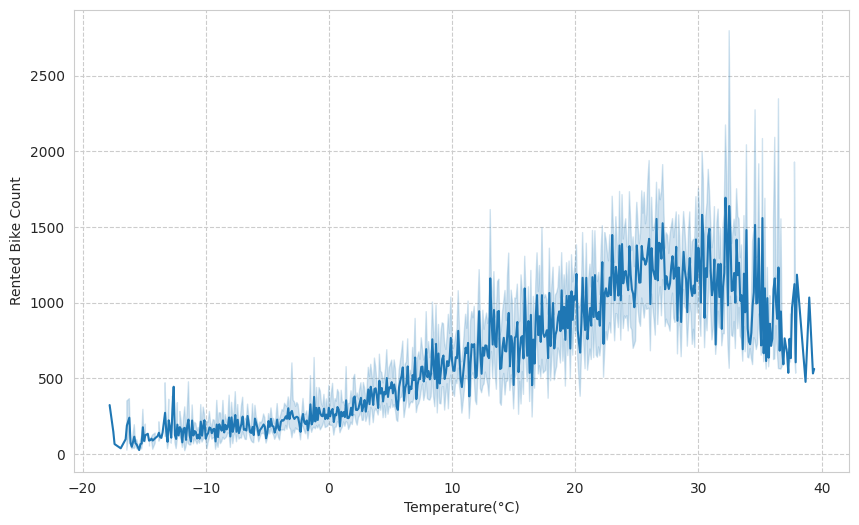

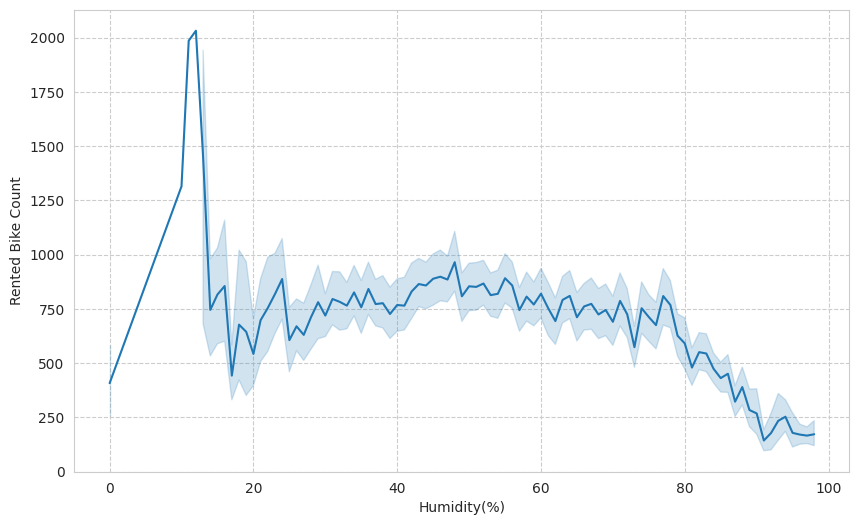

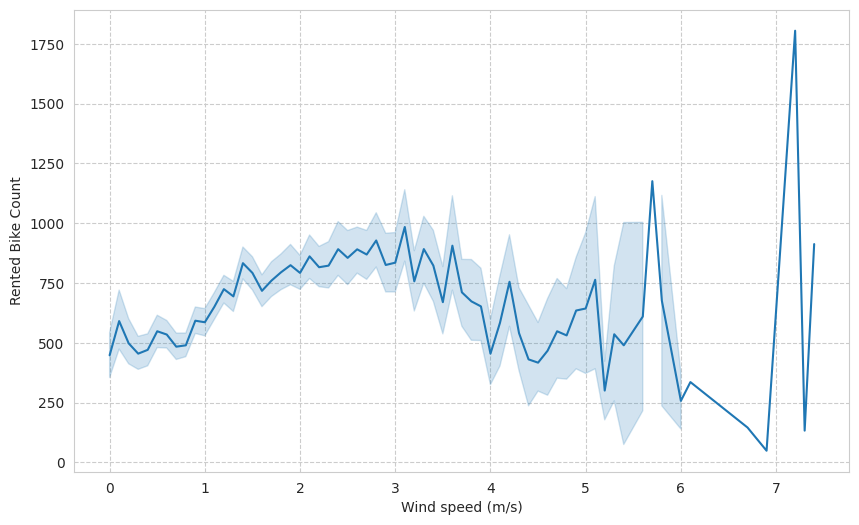

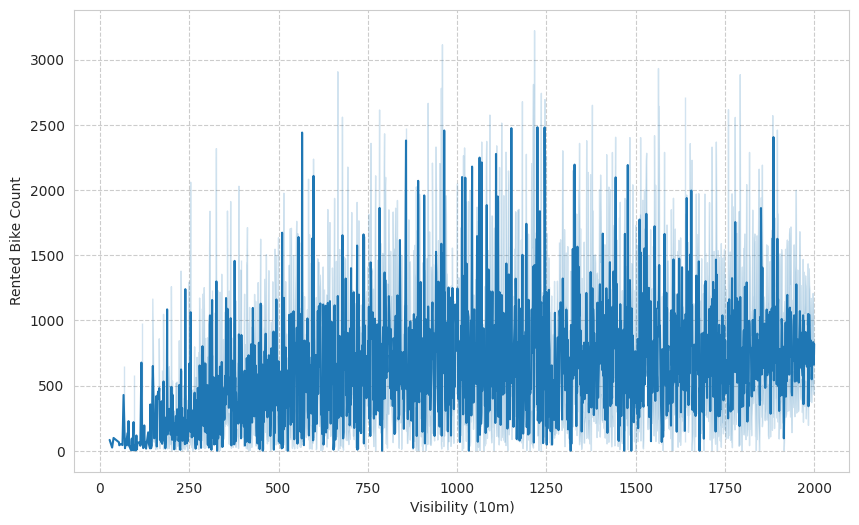

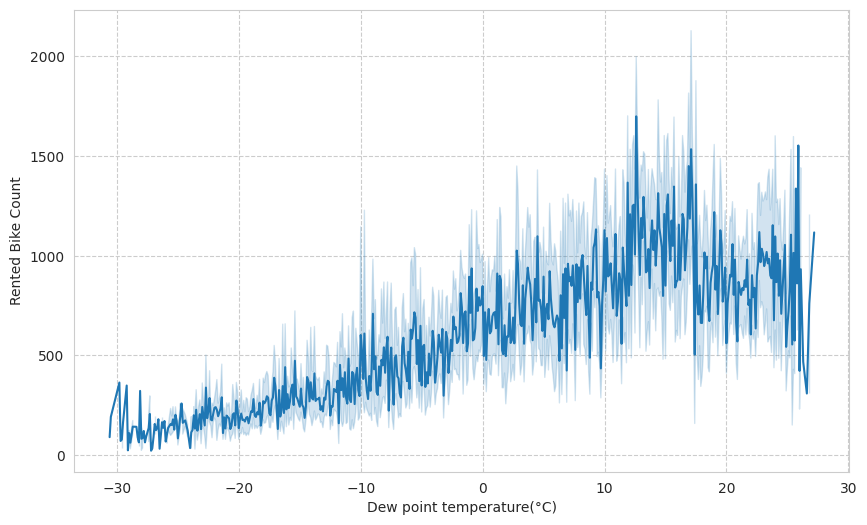

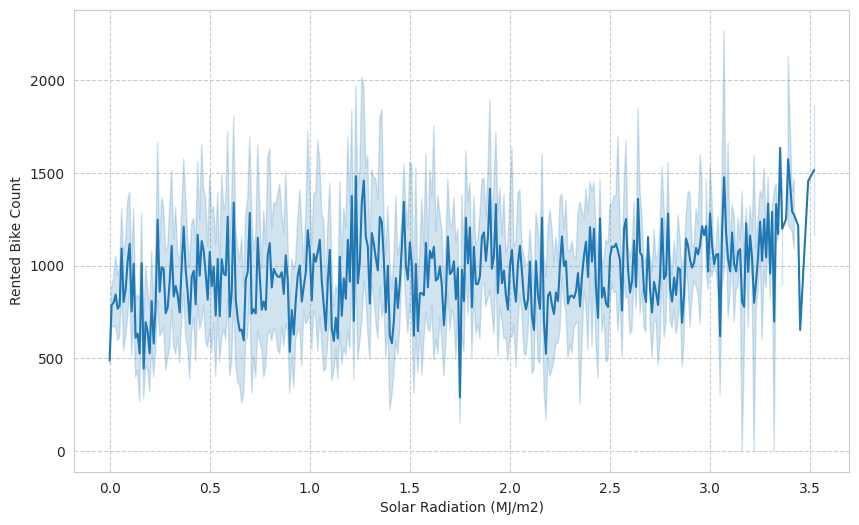

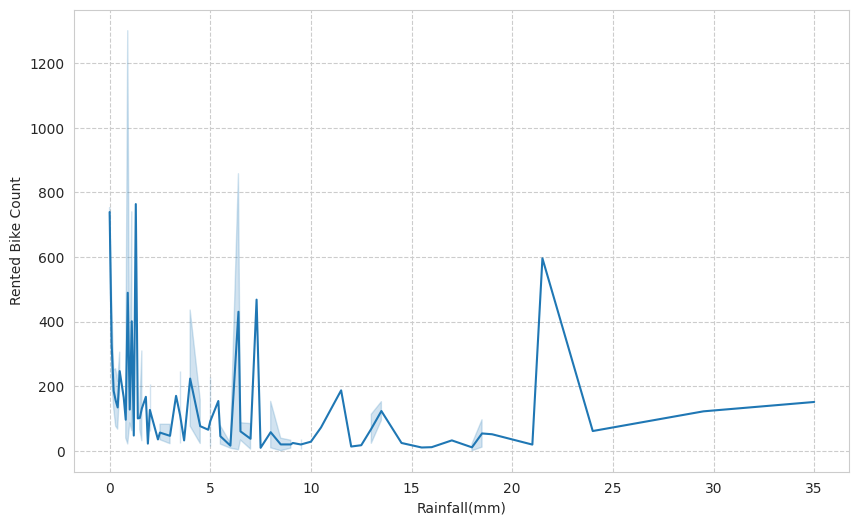

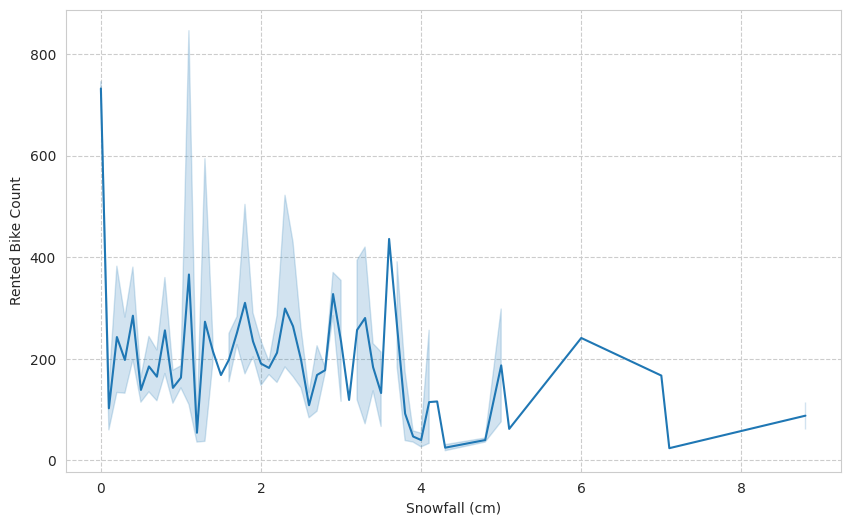

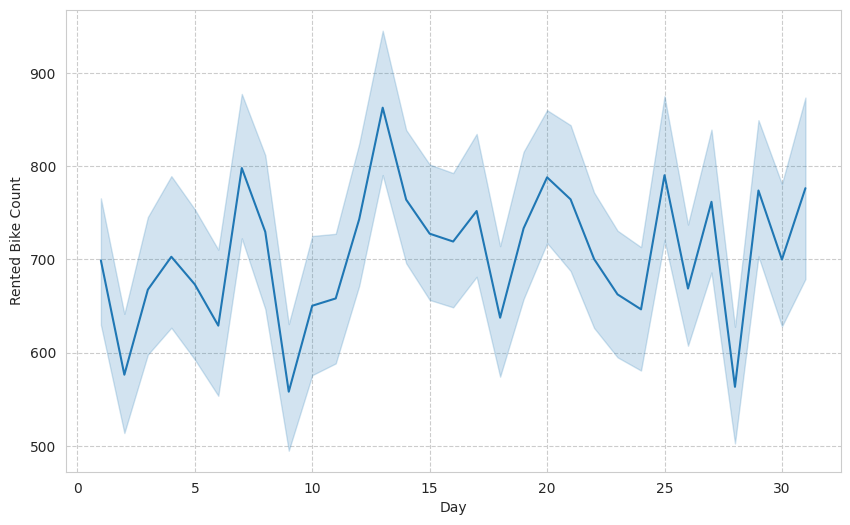

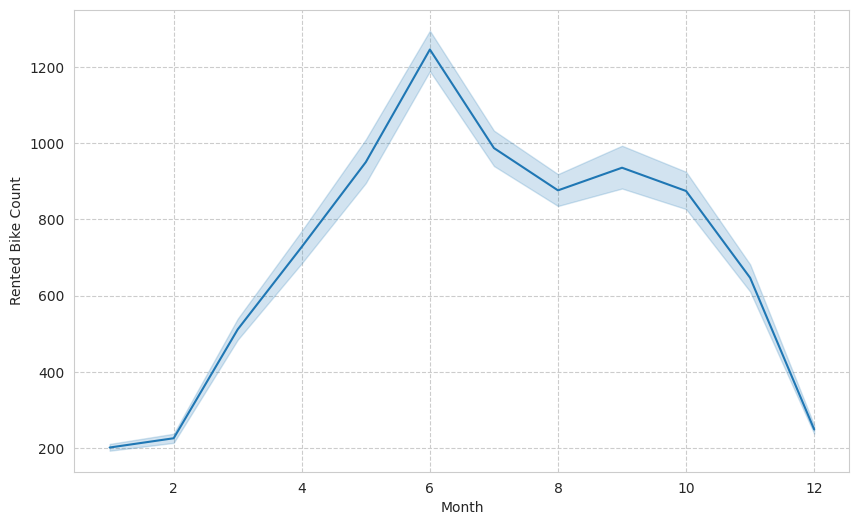

In [31]:
for column in numerical_variables:
  plt.figure(figsize=(10,6))
  sns.lineplot(x=column,y='Rented Bike Count',data=bike_df,palette='Grouped')
  plt.show()

Observations :


*   The bike count peaks in the afternoon (from 15.00 to 20.00) where temperature is the relatively very high
*  With increase in Humidity and snowfall , bike count decreases which tells you that they both are inversely proportional to bike counts.

*  Solar Radiation doesn't have any impact on bike counts.





### Categorical Variables vs Rented Bike Count

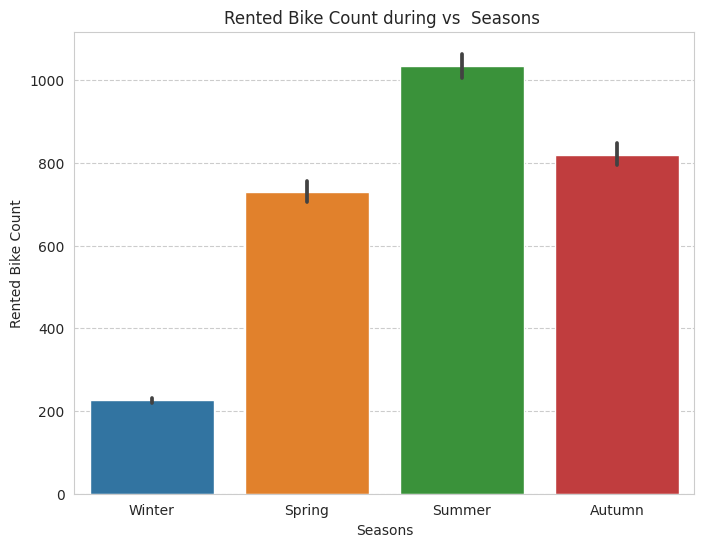

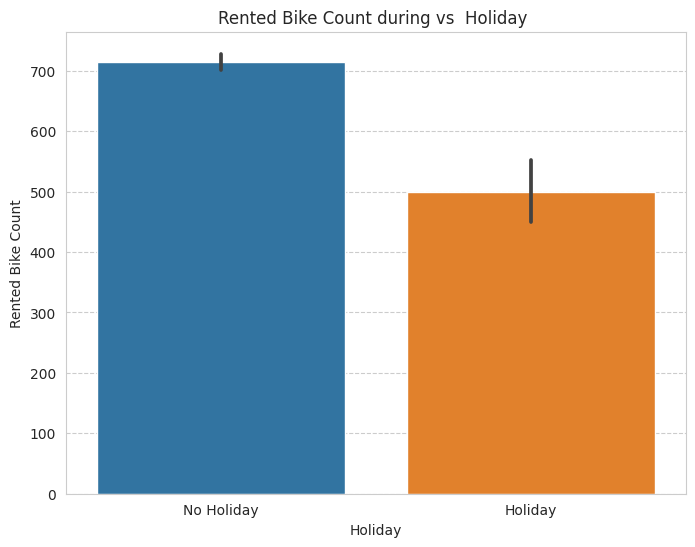

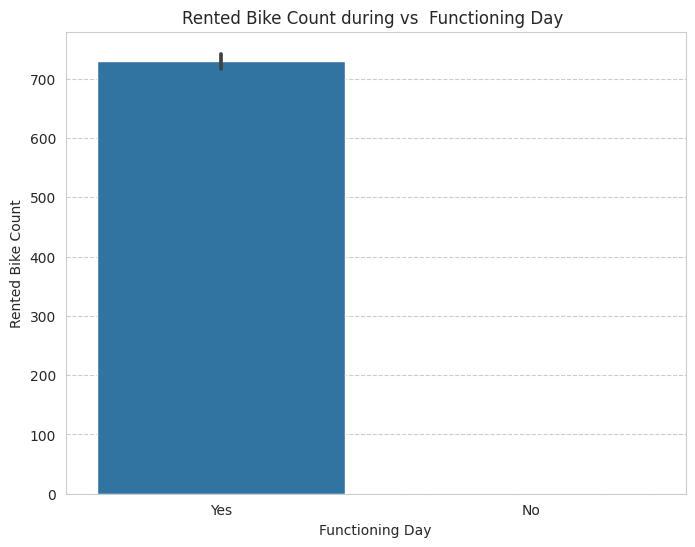

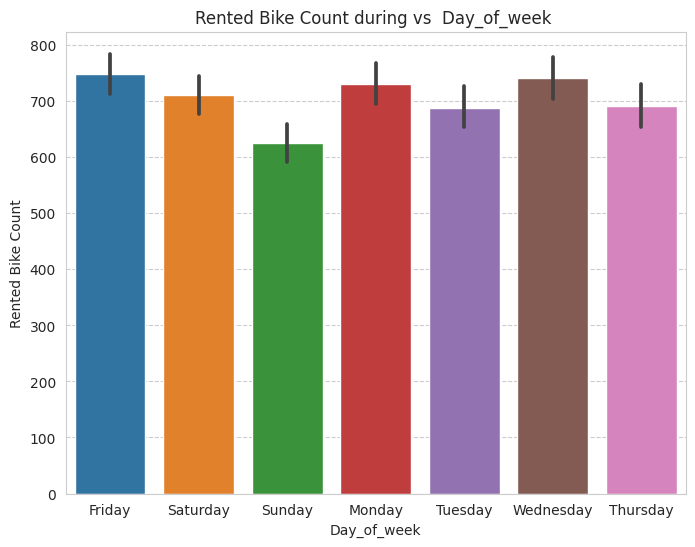

In [32]:

#Barplot
for i in categorical_variables:
    plt.figure(figsize=(8,6))
    sns.barplot(x=bike_df[i],y=bike_df['Rented Bike Count'])
    plt.title(f"Rented Bike Count during vs  {i} ")
    plt.show()

###Observations:
* In Summer the demand of rented bike is high because temperature and solar radiation is high in summer
* We have seen there are less holidays so obviously rented bike count is also less on holidays.
* Almost no demand on non functioning day.
* The demand of rental bikes slightly decreases on weekend days i.e saturday and sunday.

## Feature Selection

### Correlation

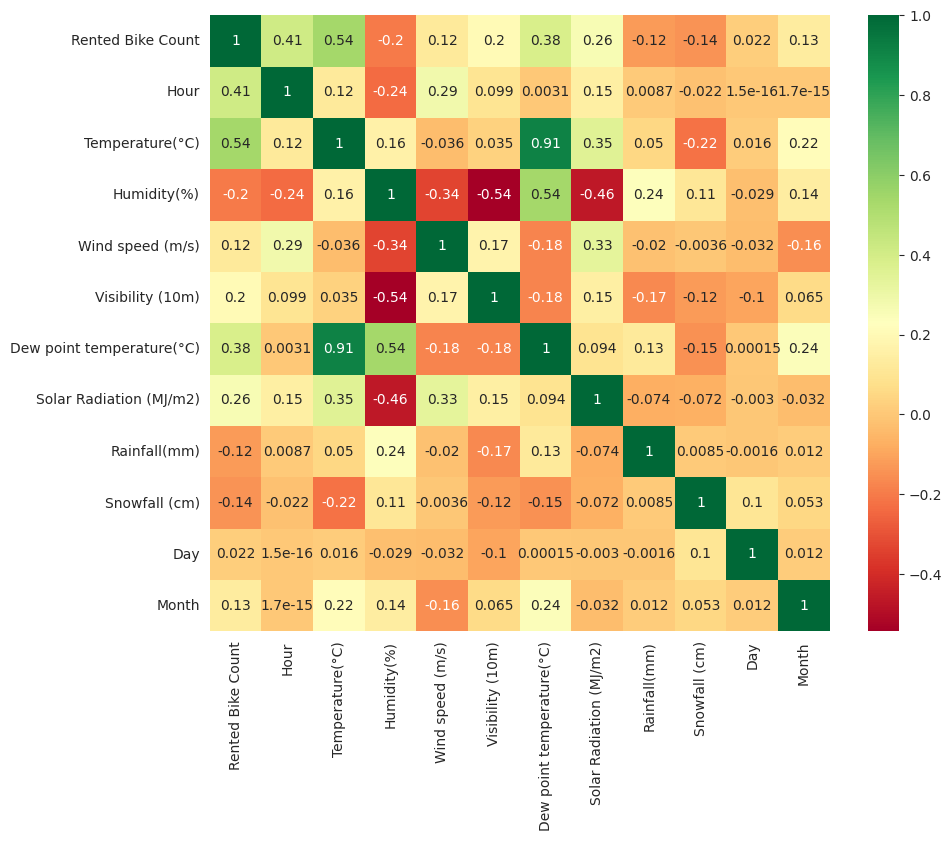

In [33]:
#correlation matrix
correlation_df= bike_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_df, annot=True, cmap= 'RdYlGn');

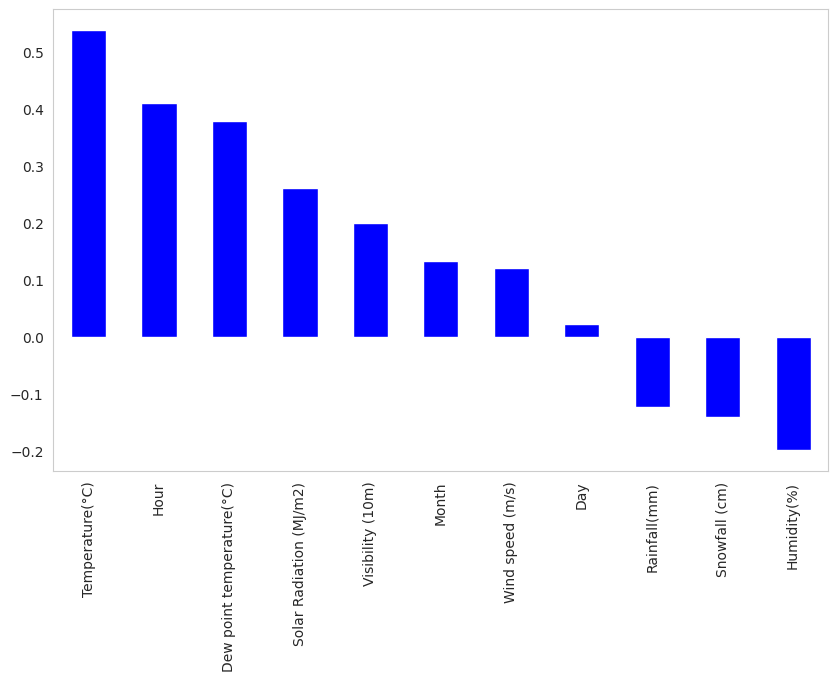

In [34]:
#bar correlation
corr_target = bike_df.corr()['Rented Bike Count'].sort_values(ascending = False)

plt.figure(figsize = (10,6))
corr_target[1:].plot(kind = 'bar', color = 'blue')
plt.grid()
plt.show()


The most correlated features to the rented bike count are:

* hour
* temperature(°c)
* dew point temperature(°c)
* solar radiation (mj/m2)


temperature and Dew point temperature are almost 0.91 correlated, So it's generate multicollinearity issue.

In [35]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

* VIF starts at 1 and has no upper limit.
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [36]:
#calling function
calculate_vif(bike_df[[col for col in numerical_variables]]).T


,0,1,2,3,4,5,6,7,8,9,10
variables,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
VIF,4.42596,38.389623,8.344305,4.879565,9.481423,19.815223,2.900819,1.082134,1.144168,4.292003,5.096115


* Here Temperature(°C) and 	Dew point temperature(°C) have high correlation VIF value.They can make whole regression model unstable.

* We need to drop one of the feature so that VIF value get reduced.

In [37]:
#calling function VIF where Dew point temperature(°C)' , 'Day' , 'Month'are not included
calculate_vif(bike_df[[col for col in numerical_variables if col not in ['Dew point temperature(°C)' , 'Day' , 'Month']]]).T

,0,1,2,3,4,5,6,7
variables,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
VIF,3.921832,3.228318,4.868221,4.608625,4.71017,2.246791,1.079158,1.120579


As you can see all these features' VIF values got reduced to under 5.00

In [38]:
#dropping 'Dew point temperature(°C)' , 'Day' , 'Month'

bike_df = bike_df.drop(['Dew point temperature(°C)' , 'Day' , 'Month'], axis=1)

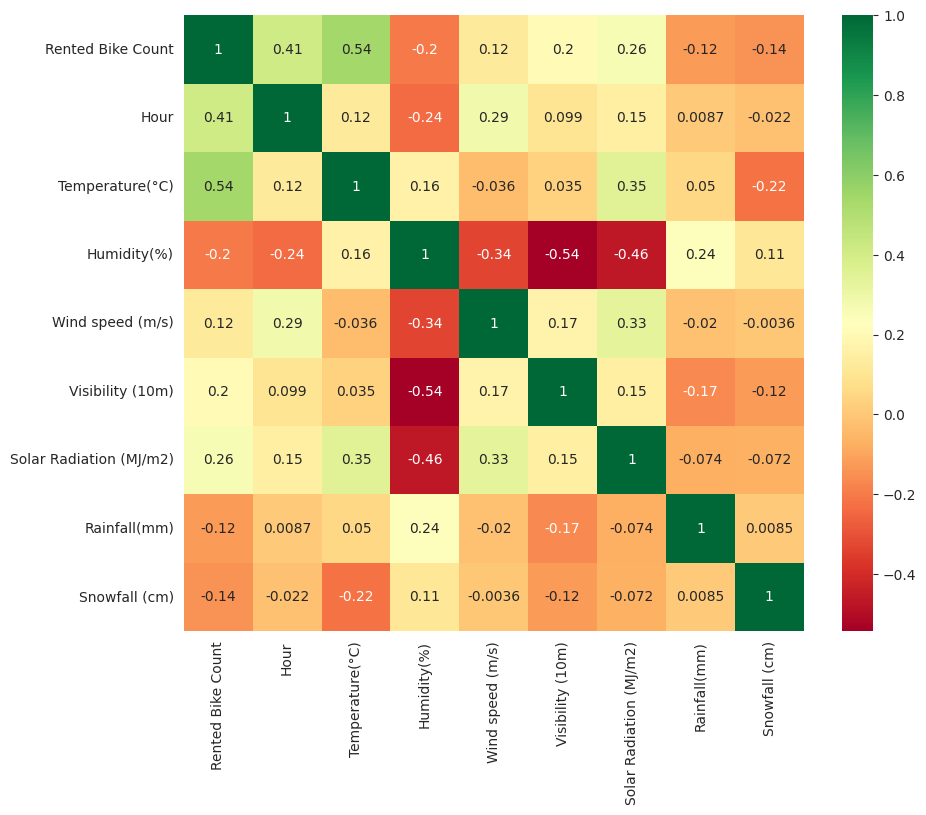

In [39]:
#correlation matrix
correlation_df= bike_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_df, annot=True, cmap= 'RdYlGn');

## Feature Enginerring

In [40]:
# creating column of weekend or not
bike_df['weekend']= bike_df['Day_of_week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df.drop('Day_of_week', axis=1, inplace=True)


In [41]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()

bike_df[['Seasons','Holiday','Functioning Day']] = bike_df[['Seasons','Holiday','Functioning Day']].apply(label_encoding.fit_transform)


In [42]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,0


### Identify Inputs and Targets

In [43]:
# Identify the input columns (a list of column names)
X = bike_df.drop('Rented Bike Count' , axis = 1)
Y = np.sqrt(bike_df["Rented Bike Count"] )

In [44]:
#checking shapes
X.shape , Y.shape

((8760, 12), (8760,))

So there are total 8760 datapoints and 12 features and we have to predict dependent variable 'Rented Bike Count'

## Train Test split

In [45]:
#spliting data into training and testing data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.3 , random_state= 0 )

In [46]:
#shape
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((6132, 12), (6132,), (2628, 12), (2628,))

## Linear Regression

In [47]:
#creaing instance of an algorithm

linear_reg = LinearRegression()

# fitting Linear Regression model
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [48]:
#predicting value of Y_test and Y_train
Y_test_pred = linear_reg.predict(X_test)
Y_train_pred = linear_reg.predict(X_train)

In [49]:
#Y- intercept
c = linear_reg.intercept_
c

-7.367857457543803

In [50]:
#coeficient array  can be given by
m = linear_reg.coef_
m

array([ 4.78038514e-01,  5.56795645e-01, -1.57744402e-01,  4.32489954e-02,
        4.02047244e-04, -9.92946769e-01, -1.53370616e+00,  1.57364803e-01,
       -2.13910221e+00,  3.42660904e+00,  2.88459521e+01, -1.45660899e+00])

In [51]:
#model scores

#score for training data
print(linear_reg.score(X_train , Y_train))

#score for testing data
print(linear_reg.score(X_test , Y_test))

0.6540967727241054
0.6501226505752835


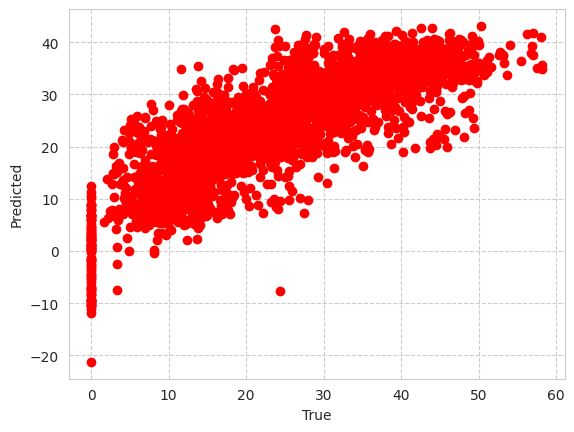

In [52]:
#scatter plot
plt.scatter(Y_test ,Y_test_pred , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Matrix

In [121]:
# create train and test result dictionaries
train_result={}
test_result= {}

def evaluation_metrics(y_true, y_pred, model=None, train=True):

  MSE  = round(mean_squared_error(y_true, y_pred), 2)
  print("MSE :" , MSE)
  RMSE = round(np.sqrt(MSE),2)
  print("RMSE :" ,RMSE)
  MAE= round(mean_absolute_error(y_true, y_pred),2)
  print("MAE :",MAE)
  r2 = round(r2_score(y_true, y_pred),2)
  print("R2 :" ,r2)
  adj_r2 = round(1-(1-r2_score(y_true, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
  print("Adjusted R2 :",adj_r2)

  # appending result into dictionary
  if train:
    train_result[model]= [MSE,RMSE,MAE,r2,adj_r2]
  else:
    test_result[model]= [MSE,RMSE,MAE,r2,adj_r2]

In [122]:
# Train data evaluation metrics
evaluation_metrics(Y_train, Y_train_pred, model='Linear',train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [123]:
# Test data evaluation metrics
evaluation_metrics(Y_test, Y_test_pred, model='Linear',train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


## Lasso Regression

In [56]:
#creating instance of Lasso algorithm
lasso = Lasso()

# Cross validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [57]:
print("The best fit alpha value :" ,lasso_regressor.best_params_)

The best fit alpha value : {'alpha': 0.0001}


In [58]:
# predictions on train and test dataset
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso= lasso_regressor.predict(X_test)

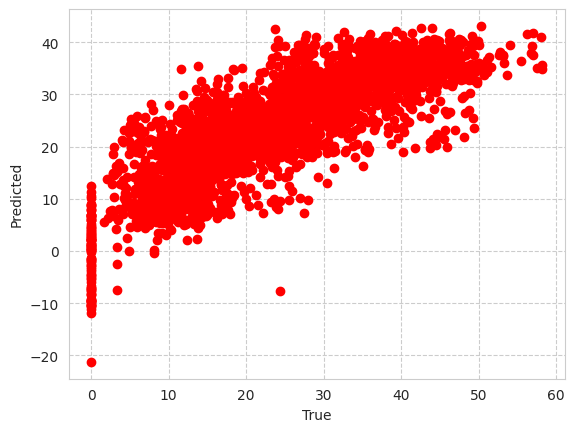

In [59]:
#scatter plot
plt.scatter(Y_test ,test_pred_lasso , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Matrix

In [124]:
# Train data evaluation metrics
evaluation_metrics(Y_train, train_pred_lasso, 'Lasso', train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [125]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_pred_lasso, 'Lasso', train=False)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


## Ridge Regression

In [111]:
#creating instance of Ridge algorithm
ridge = Ridge()

# cross validation
parameters_ridge = {'alpha': [1e-10,1e-5,1e-4,1e-3,1e-2,0.5,1,1.5,5,10,20,30,35,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters_ridge, cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.5, 1,
                                   1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60,
                                   100]})

In [112]:
print("The best fit alpha value :" ,ridge_regressor.best_params_)

The best fit alpha value : {'alpha': 1e-10}


In [113]:
# predictions on train and test dataset
train_ridge_pred = ridge_regressor.predict(X_train)
test_ridge_pred = ridge_regressor.predict(X_test)

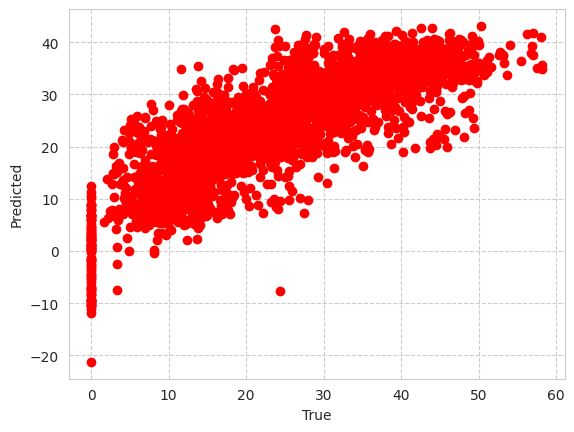

In [114]:
#scatter plot
plt.scatter(Y_test ,test_ridge_pred  , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Evaluation Matrix

In [126]:
# Train data evaluation metrics
evaluation_metrics(Y_train, train_ridge_pred, 'Ridge', train=True)

MSE : 53.81
RMSE : 7.34
MAE : 5.64
R2 : 0.65
Adjusted R2 : 0.65


In [127]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_ridge_pred, 'Ridge', train=True)

MSE : 53.74
RMSE : 7.33
MAE : 5.66
R2 : 0.65
Adjusted R2 : 0.65


## RandomForrest Regressor

In [68]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [69]:
# hyperparameter grid
param_dict_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
  }

In [70]:
# create regressor object
rf_model= RandomForestRegressor()

# fitting gridsearch
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, min

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [71]:
# best parameters
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [72]:
# optimal model
rf_optimal_model= rf_grid.best_estimator_

In [73]:
# Model score
rf_optimal_model.score(X_train,Y_train)

0.8656537085428149

In [74]:
# Making predictions on train and test data
train_pred_rf= rf_optimal_model.predict(X_train)
test_pred_rf= rf_optimal_model.predict(X_test)

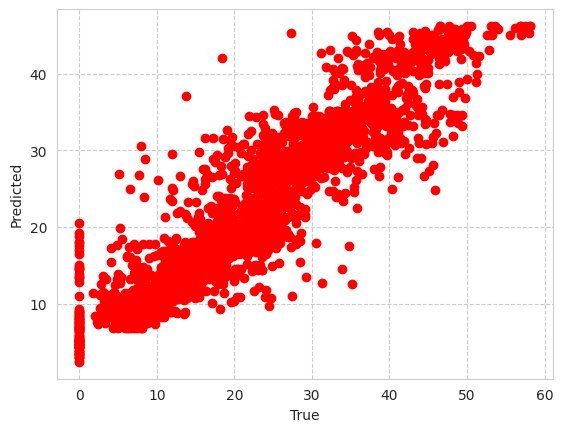

In [75]:
#scatter plot

plt.scatter(Y_test ,test_pred_rf  , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [128]:
# Train data Evaluation metrics
evaluation_metrics(Y_train, train_pred_rf, 'Random Forest', train=True)

MSE : 20.9
RMSE : 4.57
MAE : 3.27
R2 : 0.87
Adjusted R2 : 0.87


In [129]:
# Test data Evaluation metrics
evaluation_metrics(Y_test, test_pred_rf, 'Random Forest', train=False)

MSE : 24.22
RMSE : 4.92
MAE : 3.5
R2 : 0.84
Adjusted R2 : 0.84


## Gradient Boosting Regressor

In [79]:
#importing packages
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
# Hyperparameter Grid
gb_params = {'n_estimators' : [50, 100, 150],
              'max_depth' : [5, 6, 7, 8],
              'min_samples_split' : [50, 80],
              'min_samples_leaf' : [40, 50]}

In [82]:
# Create an instance of the  GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = gb_params ,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error')

gb_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, m

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [83]:
# best parameters
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 150}

In [84]:
#best estimator

gb_optimal_model= gb_grid.best_estimator_

In [86]:
# Model score
gb_optimal_model.score(X_train,Y_train)

0.9683883120906536

In [87]:
# Making predictions on train and test data
train_pred_gb= gb_optimal_model.predict(X_train)
test_pred_gb= gb_optimal_model.predict(X_test)

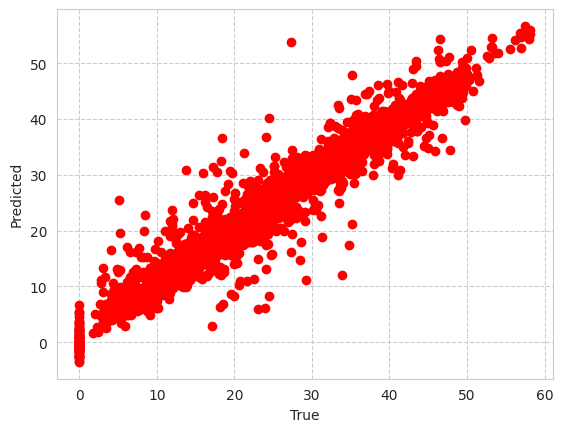

In [88]:
#scatter plot

plt.scatter(Y_test ,test_pred_gb  , color = 'r')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [130]:
# Train data evaluation metrics
evaluation_metrics(Y_train,train_pred_gb, 'Gradient Boosting', train=True)

MSE : 4.92
RMSE : 2.22
MAE : 1.49
R2 : 0.97
Adjusted R2 : 0.97


In [131]:
# Test data evaluation metrics
evaluation_metrics(Y_test,test_pred_gb, 'Gradient Boosting', train=False)

MSE : 10.06
RMSE : 3.17
MAE : 2.08
R2 : 0.93
Adjusted R2 : 0.93


## Results

In [132]:
#training results of evaluation metrics
results_train_df= pd.DataFrame(train_result).T.reset_index()
results_train_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
results_train_df

,Model,MSE,RMSE,MAE,R2 score,Adjusted R2
0,Linear,53.81,7.34,5.64,0.65,0.65
1,Lasso,53.81,7.34,5.64,0.65,0.65
2,Ridge,53.74,7.33,5.66,0.65,0.65
3,Random Forest,20.90,4.57,3.27,0.87,0.87
4,Gradient Boosting,4.92,2.22,1.49,0.97,0.97
